In [1]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
data.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [5]:
data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
data.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
# customer purchasing behaviour
DATE= data.groupby('DATE').agg( {'TXN_ID':'sum', 'PROD_NAME':'sum', 'PROD_QTY':'sum', 'TOT_SALES': 'sum'} )
DATE.head(15)

,TXN_ID,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,
43282,96468206,Smiths Crnkle Chip Orgnl Big Bag 380gPringles...,1394,5372.2
43283,93577472,CCs Tasty Cheese 175gTwisties Cheese 27...,1367,5315.4
43284,100010549,Pringles Original Crisps 134gWW Sour Cream &...,1389,5321.8
43285,98056784,Doritos Cheese Supreme 330gSmiths Crnkle ...,1373,5309.9
43286,96977337,Woolworths Mild Salsa 300gRRD SR Slow Rst ...,1358,5080.9
43287,103267244,Kettle Original 175gKettle 135g Swt Pot Sea Sa...,1466,5604.9
43288,98683178,Red Rock Deli Thai Chilli&Lime 150gOld El Pas...,1444,5378.3
43289,91827143,Burger Rings 220gInfzns Crn Crnchers Tangy Gca...,1336,5021.1
43290,102757536,GrnWves Plus Btroot & Chilli Jam 180gThins Chi...,1441,5518.9


In [20]:
most_purchased_product = data.groupby('PROD_QTY').agg({'TOT_SALES': 'sum'}).reset_index()
most_purchased_product = most_purchased_product.sort_values('TOT_SALES', ascending=True)
Top_10 = most_purchased_product.head(10)
Top_10

,PROD_QTY,TOT_SALES
5,200,1300.00
2,3,4960.05
3,4,5976.60
4,5,8183.15
0,1,102220.00
1,2,1811775.20


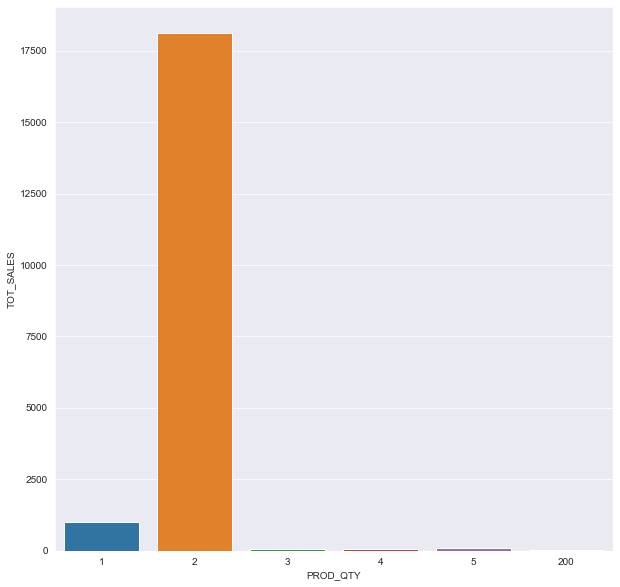

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
sns.barplot(x='PROD_QTY', y=Top_10['TOT_SALES']/100, data=Top_10)

In [24]:
highest_sales = data.groupby('PROD_NAME').agg({'TOT_SALES': 'sum'}).reset_index()
highest_sales = highest_sales.sort_values('TOT_SALES', ascending=False)
TOP_10 = highest_sales.head(10)
TOP_10

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
33,Kettle Mozzarella Basil & Pesto 175g,34457.4
76,Smiths Crinkle Original 330g,34302.6
6,Cheezels Cheese 330g,34296.9
12,Doritos Cheese Supreme 330g,33390.6
39,Kettle Sweet Chilli And Sour Cream 175g,33031.8
34,Kettle Original 175g,32740.2
35,Kettle Sea Salt And Vinegar 175g,32589.0


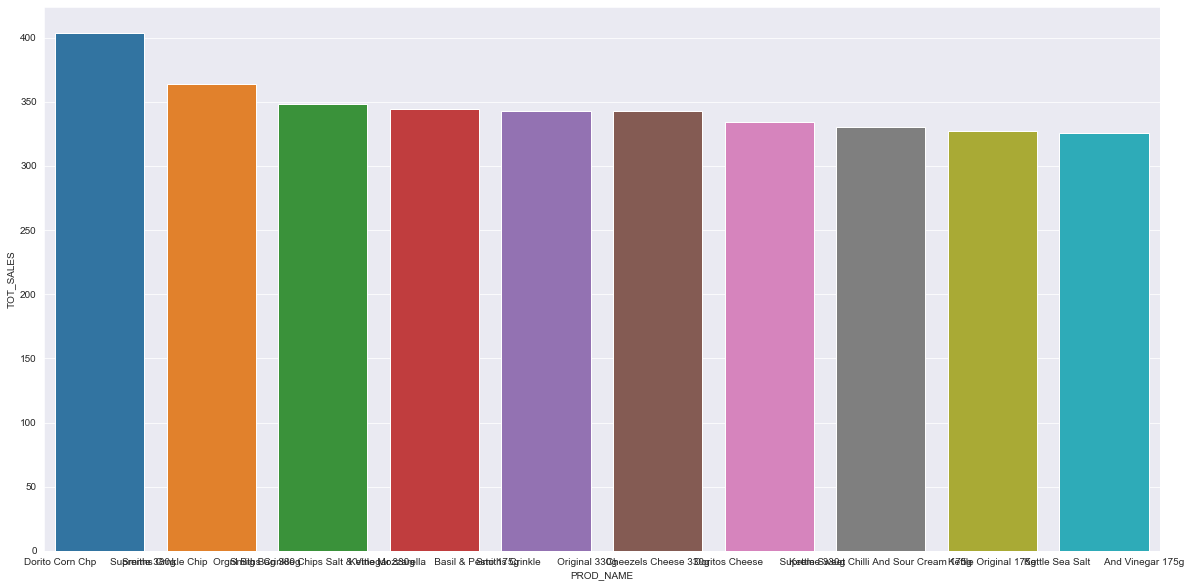

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10))
sns.barplot(x='PROD_NAME', y=TOP_10['TOT_SALES']/100, data=TOP_10)